In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
# Read in the raw data from resources
saleprice_df = pd.read_csv(Path("resources/median_sale_price_all.csv"))
rates_df = pd.read_csv(Path("resources/rates.csv"))

# source https://www.irs.gov/statistics/soi-tax-stats-adjusted-gross-income-agi-percentile-data-by-state
df_13 = pd.read_csv(Path("resources/13instateshares.csv"))
df_14 = pd.read_csv(Path("resources/14instateshares.csv"))
df_15 = pd.read_csv(Path("resources/15instateshares.csv"))
df_16 = pd.read_csv(Path("resources/16instateshares.csv"))
df_17 = pd.read_csv(Path("resources/17instateshares.csv"))
df_18 = pd.read_csv(Path("resources/18instateshares.csv"))
df_19 = pd.read_csv(Path("resources/19instateshares.csv"))
df_20 = pd.read_csv(Path("resources/20instateshares.csv"))

FileNotFoundError: [Errno 2] No such file or directory: 'resources\\rates.csv'

In [3]:
# Create combined AGI DataFrame
columns = ['statefips', 'state', 'agi_01', 'agi_05', 'agi_10', 'agi_25', 'agi_50', 'agi_75']
x = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

df_13_tx = df_13.loc[df_13['state'] == 'TX']
df_2013 = df_13_tx[columns]
df_2013.rename(columns = {'statefips': 'year'}, inplace=True)
df_2013['year'] = df_2013['year'].replace(48, 2013)

df_14_tx = df_14.loc[df_14['state'] == 'TX']
df_2014 = df_14_tx[columns]
df_2014.rename(columns = {'statefips': 'year'}, inplace=True)
df_2014['year'] = df_2014['year'].replace(48, 2014)

df_15_tx = df_15.loc[df_15['state'] == 'TX']
df_2015 = df_15_tx[columns]
df_2015.rename(columns = {'statefips': 'year'}, inplace=True)
df_2015['year'] = df_2015['year'].replace(48, 2015)

df_16_tx = df_16.loc[df_16['state'] == 'TX']
df_2016 = df_16_tx[columns]
df_2016.rename(columns = {'statefips': 'year'}, inplace=True)
df_2016['year'] = df_2016['year'].replace(48, 2016)

df_17_tx = df_17.loc[df_17['state'] == 'TX']
df_2017 = df_17_tx[columns]
df_2017.rename(columns = {'statefips': 'year'}, inplace=True)
df_2017['year'] = df_2017['year'].replace(48, 2017)

df_18_tx = df_18.loc[df_18['state'] == 'TX']
df_2018 = df_18_tx[columns]
df_2018.rename(columns = {'statefips': 'year'}, inplace=True)
df_2018['year'] = df_2018['year'].replace(48, 2018)

df_19_tx = df_19.loc[df_19['state'] == 'TX']
df_2019 = df_19_tx[columns]
df_2019.rename(columns = {'statefips': 'year'}, inplace=True)
df_2019['year'] = df_2019['year'].replace(48, 2019)

df_20_tx = df_20.loc[df_20['state'] == 'TX']
df_2020 = df_20_tx[columns]
df_2020.rename(columns = {'statefips': 'year'}, inplace=True)
df_2020['year'] = df_2020['year'].replace(48, 2020)

# Combine the DataFrames for Income
df_all = pd.concat([df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]).reset_index()
income_all = df_all[['year', 'agi_01', 'agi_05', 'agi_10', 'agi_25', 'agi_50', 'agi_75']]
income_all

C:\Users\grant\AppData\Local\Temp\ipykernel_4208\2862780272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013.rename(columns = {'statefips': 'year'}, inplace=True)
C:\Users\grant\AppData\Local\Temp\ipykernel_4208\2862780272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['year'] = df_2013['year'].replace(48, 2013)
C:\Users\grant\AppData\Local\Temp\ipykernel_4208\2862780272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,year,agi_01,agi_05,agi_10,agi_25,agi_50,agi_75
0,2013,453430.00,184606.0,128782.0,72895.0,35617.0,17444.0
1,2014,497715.00,195185.0,135237.0,76173.0,37424.0,18299.0
2,2015,496385.04,199076.0,138372.0,77638.0,38208.0,18802.0
3,2016,463308.00,195144.0,136695.0,76956.0,38194.0,18959.0
4,2017,528049.00,209115.0,144514.0,80809.0,40022.0,19645.0
5,2018,542780.00,216799.0,149881.0,83900.0,41726.0,20613.0
6,2019,547661.90,220593.0,152085.0,84587.0,42099.0,20729.0
7,2020,543478.70,219156.0,150387.0,82532.0,40878.0,20115.0


In [4]:
# Create a summary Table of Wealth Change
results = {}
columns = ['agi_01', 'agi_05', 'agi_10', 'agi_25', 'agi_50', 'agi_75']

# Loop through each column and calculate the change
for column in columns:
    difference = income_all[column][7] - income_all[column][0]
    percent_diff = 100 * (income_all[column][7] - income_all[column][0]) / income_all[column][0]
    results[column] = {'2013 AGI': income_all[column][0],
                       '2020 AGI': income_all[column][7],
                       'Wealth Change': difference,
                      'Percent Change': percent_diff
                      }

# Convert the results dictionary to a DataFrame
wealth_change = pd.DataFrame.from_dict(results, orient='index')
wealth_change

,2013 AGI,2020 AGI,Wealth Change,Percent Change
agi_01,453430.0,543478.7,90048.7,19.859449
agi_05,184606.0,219156.0,34550.0,18.715535
agi_10,128782.0,150387.0,21605.0,16.776413
agi_25,72895.0,82532.0,9637.0,13.220385
agi_50,35617.0,40878.0,5261.0,14.771036
agi_75,17444.0,20115.0,2671.0,15.311855


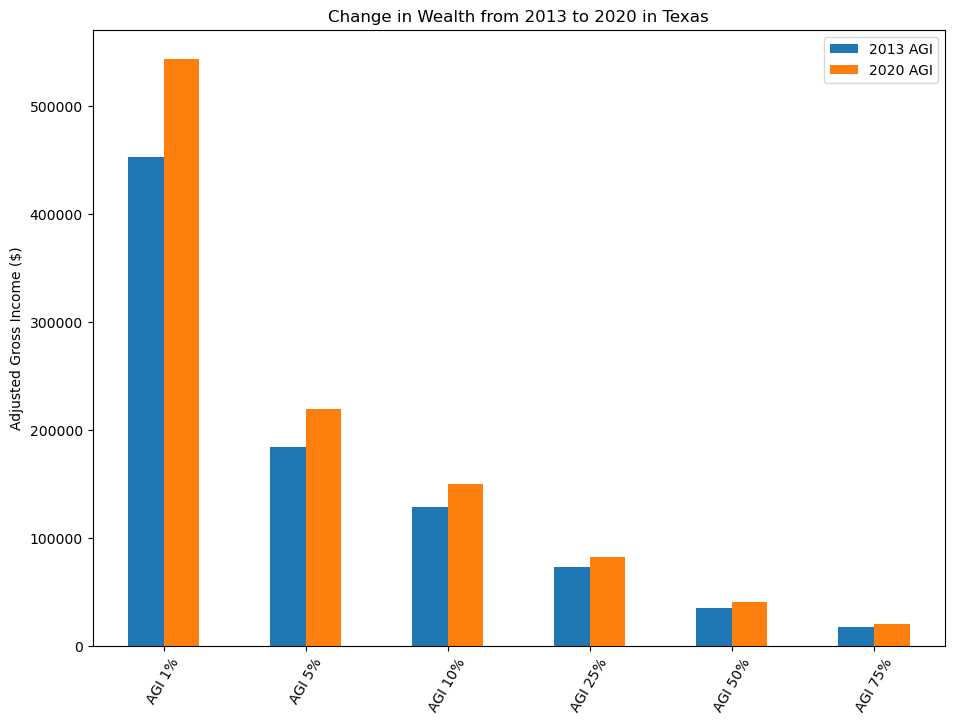

In [5]:
# Plot summary as a bar chart
df = wealth_change[['2013 AGI', '2020 AGI']]
figsize = (11,8)
new_labels = ['AGI 1%', 'AGI 5%','AGI 10%','AGI 25%','AGI 50%','AGI 75%']

df_plot = df.plot(kind='bar', figsize=figsize, 
              title='Change in Wealth from 2013 to 2020 in Texas', 
              legend=True, ylabel="Adjusted Gross Income ($)").set_xticklabels(new_labels, rotation=60)

plt.show()

In [6]:
# Filter out our Saleprice DataFrame to only display the four major Texas MSA
saleprice_tx = saleprice_df.loc[(saleprice_df["SizeRank"] < 30) &
                               (saleprice_df["StateName"] == "TX")]

# Drop unnecessary values to make transpose easier
saleprice_tx = saleprice_tx.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)

# Transpose the dataset to make columns contain specific information to only the MSA
saleprice_t = saleprice_tx.transpose().reset_index()

# This will move the city name into the index and make the DataFrame more readable
saleprice_t.columns = saleprice_t.iloc[0]
saleprice_t = saleprice_t.iloc[1:]
saleprice_t.rename(columns = {"RegionName":"Date"}, inplace=True)

# Convert the date to datetime
saleprice_t['Date'] = pd.to_datetime(saleprice_t['Date'])
saleprice_t

,Date,"Dallas, TX","Houston, TX","San Antonio, TX","Austin, TX"
1,2008-02-29,137000.0,143900.0,135825.0,178950.0
2,2008-03-31,146700.0,143000.0,140000.0,188000.0
3,2008-04-30,144000.0,143825.0,144850.0,184995.0
4,2008-05-31,149900.0,149000.0,144900.0,190000.0
5,2008-06-30,155000.0,155000.0,152500.0,192500.0
...,...,...,...,...,...
180,2023-01-31,355000.0,299900.0,300000.0,460000.0
181,2023-02-28,372000.0,308000.0,307000.0,450000.0
182,2023-03-31,374500.0,315000.0,305000.0,462990.0
183,2023-04-30,385000.0,320000.0,310000.0,479495.0


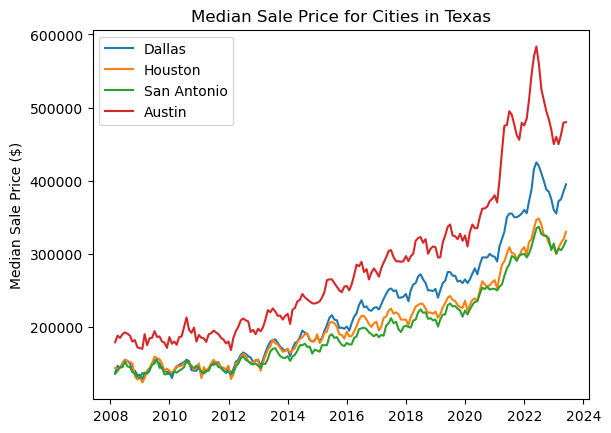

In [7]:
# Plot median sale price
plt.plot(saleprice_t['Date'], saleprice_t['Dallas, TX'], label='Dallas', linestyle='-')
plt.plot(saleprice_t['Date'], saleprice_t['Houston, TX'], label='Houston', linestyle='-')
plt.plot(saleprice_t['Date'], saleprice_t['San Antonio, TX'], label='San Antonio', linestyle='-')
plt.plot(saleprice_t['Date'], saleprice_t['Austin, TX'], label='Austin', linestyle='-')

plt.legend()
plt.title('Median Sale Price for Cities in Texas')
plt.ylabel('Median Sale Price ($)')

plt.show()

In [8]:
# Create a summary Table of Home price change 2013 t0 current
results = {}
columns = ['Dallas, TX', 'Houston, TX', 'San Antonio, TX', 'Austin, TX']

# Loop through each column and calculate the change
for column in columns:
    difference = saleprice_t[column][155] - saleprice_t[column][60]
    percent_diff = 100 * (saleprice_t[column][155] - saleprice_t[column][60]) / saleprice_t[column][60]
    results[column] = {'2013 Sale Price': saleprice_t[column][60],
                       '2020 Sale Price': saleprice_t[column][155],
                       'Sale Price Change': difference,
                      'Percent Change': percent_diff
                      }

# Convert the results dictionary to a DataFrame
saleprice_change = pd.DataFrame.from_dict(results, orient='index')
saleprice_change

,2013 Sale Price,2020 Sale Price,Sale Price Change,Percent Change
"Dallas, TX",146000.0,296000.0,150000.0,102.739726
"Houston, TX",140000.0,264000.0,124000.0,88.571429
"San Antonio, TX",143900.0,252000.0,108100.0,75.121612
"Austin, TX",194000.0,380009.0,186009.0,95.880928


In [9]:
# Create new DataFrame that Combines AGI and Saleprice info
saleprice_year = saleprice_t.groupby(saleprice_t['Date'].dt.year)['Dallas, TX', 'Houston, TX', 'San Antonio, TX', 'Austin, TX'].mean().reset_index()
saleprice_year.rename(columns = {"Date":"year"}, inplace=True)
saleprice_agi_df = pd.merge(income_all,saleprice_year, on='year')

saleprice_agi_df

C:\Users\grant\AppData\Local\Temp\ipykernel_4208\1480024975.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  saleprice_year = saleprice_t.groupby(saleprice_t['Date'].dt.year)['Dallas, TX', 'Houston, TX', 'San Antonio, TX', 'Austin, TX'].mean().reset_index()


,year,agi_01,agi_05,agi_10,agi_25,agi_50,agi_75,"Dallas, TX","Houston, TX","San Antonio, TX","Austin, TX"
0,2013,453430.00,184606.0,128782.0,72895.0,35617.0,17444.0,170224.000000,166929.166667,158919.000000,213804.166667
1,2014,497715.00,195185.0,135237.0,76173.0,37424.0,18299.0,181825.000000,180522.750000,167904.166667,231716.666667
2,2015,496385.04,199076.0,138372.0,77638.0,38208.0,18802.0,200466.666667,193308.333333,178885.416667,253366.666667
3,2016,463308.00,195144.0,136695.0,76956.0,38194.0,18959.0,221000.000000,202937.500000,189564.583333,273659.666667
4,2017,528049.00,209115.0,144514.0,80809.0,40022.0,19645.0,242223.333333,212820.833333,198775.000000,290958.333333
5,2018,542780.00,216799.0,149881.0,83900.0,41726.0,20613.0,255800.000000,221631.333333,211902.083333,309124.333333
6,2019,547661.90,220593.0,152085.0,84587.0,42099.0,20729.0,262761.250000,230256.250000,220537.416667,320563.750000
7,2020,543478.70,219156.0,150387.0,82532.0,40878.0,20115.0,284408.333333,247583.333333,241730.833333,351267.000000


In [10]:
# Create Rates DataFrame
rates_df['Week'] = pd.to_datetime(rates_df['Week'])
rates_summary = rates_df.groupby(rates_df['Week'].dt.year)['Rate'].mean().reset_index()

rates_summary

,Week,Rate
0,2013,3.975577
1,2014,4.168868
2,2015,3.850577
3,2016,3.654038
4,2017,3.989808
5,2018,4.544615
6,2019,3.935769
7,2020,3.111698


In [11]:
# Deep dive into {city}
city = 'Austin, TX'
saleprice_agi_df['20% Downpayment'] = saleprice_agi_df[city] * 0.20

df1 =saleprice_agi_df[['year', city, '20% Downpayment', 'agi_01', 'agi_05', 
                       'agi_10', 'agi_25', 'agi_50', 'agi_75']]

# Create an empty list to store the monthly payment
monthly_mortgage = []
annual_mortgage = []
hoa_tax_insurance_annual = []
total_annual_payment = []

house_prices = df1[city]
rates = rates_summary['Rate'] / 100  # Convert rates to decimal form
down_payment_percent = 20
loan_term_years = 30
hoa_factor = 0.022
insurance_factor = 0.17
tax_factor = 0.025

# Calculate monthly payment for each house price and rate
for house_price, rate in zip(house_prices, rates):
    # Calculate down payment
    down_payment = house_price * (down_payment_percent / 100)

    # Calculate loan amount
    loan_amount = house_price - down_payment

    # Calculate monthly interest rate
    monthly_interest_rate = rate / 12

    # Calculate total number of payments (loan term in months)
    total_payments = loan_term_years * 12

    # Calculate monthly payment using the formula
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate)**total_payments) / ((1 + monthly_interest_rate)**total_payments - 1)
    yearly_payment = 12 * monthly_payment
    hoa_annual = yearly_payment * (hoa_factor + insurance_factor + tax_factor)
    total_annual = yearly_payment + hoa_annual
    
    monthly_mortgage.append(monthly_payment)
    annual_mortgage.append(yearly_payment)
    hoa_tax_insurance_annual.append(hoa_annual)
    total_annual_payment.append(total_annual)    
    
# Add the new columns
df1['Monthly Mortgage'] = monthly_mortgage
df1['Annual Mortgage'] = annual_mortgage
df1['HOA, Insurance, & Taxes'] = hoa_tax_insurance_annual
df1['Total Annual Housing Cost'] = total_annual_payment

df1

C:\Users\grant\AppData\Local\Temp\ipykernel_4208\1901203008.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Monthly Mortgage'] = monthly_mortgage
C:\Users\grant\AppData\Local\Temp\ipykernel_4208\1901203008.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Annual Mortgage'] = annual_mortgage


,year,"Austin, TX",20% Downpayment,agi_01,agi_05,agi_10,agi_25,agi_50,agi_75,Monthly Mortgage,Annual Mortgage,"HOA, Insurance, & Taxes",Total Annual Housing Cost
0,2013,213804.166667,42760.833333,453430.00,184606.0,128782.0,72895.0,35617.0,17444.0,814.180546,9770.166548,2120.126141,11890.292688
1,2014,231716.666667,46343.333333,497715.00,195185.0,135237.0,76173.0,37424.0,18299.0,903.142301,10837.707612,2351.782552,13189.490164
2,2015,253366.666667,50673.333333,496385.04,199076.0,138372.0,77638.0,38208.0,18802.0,950.309816,11403.717793,2474.606761,13878.324554
3,2016,273659.666667,54731.933333,463308.00,195144.0,136695.0,76956.0,38194.0,18959.0,1002.004355,12024.052261,2609.219341,14633.271601
4,2017,290958.333333,58191.666667,528049.00,209115.0,144514.0,80809.0,40022.0,19645.0,1109.896369,13318.756429,2890.170145,16208.926574
5,2018,309124.333333,61824.866667,542780.00,216799.0,149881.0,83900.0,41726.0,20613.0,1259.594364,15115.132366,3279.983723,18395.116090
6,2019,320563.750000,64112.750000,547661.90,220593.0,152085.0,84587.0,42099.0,20729.0,1214.859023,14578.308276,3163.492896,17741.801171
7,2020,351267.000000,70253.400000,543478.70,219156.0,150387.0,82532.0,40878.0,20115.0,1201.760384,14421.124611,3129.384041,17550.508652


In [12]:
# Create the final Austin Summary Table
austin_housing = df1.copy()
austin_summary_table = austin_housing.drop(columns=['agi_01', 'agi_05', 'agi_10', 
                                                    'agi_25', 'agi_50', 'agi_75'])

austin_summary_table.rename(columns={'Austin, TX': 'Median Sale Price'}, inplace=True)

austin_summary_table

,year,Median Sale Price,20% Downpayment,Monthly Mortgage,Annual Mortgage,"HOA, Insurance, & Taxes",Total Annual Housing Cost
0,2013,213804.166667,42760.833333,814.180546,9770.166548,2120.126141,11890.292688
1,2014,231716.666667,46343.333333,903.142301,10837.707612,2351.782552,13189.490164
2,2015,253366.666667,50673.333333,950.309816,11403.717793,2474.606761,13878.324554
3,2016,273659.666667,54731.933333,1002.004355,12024.052261,2609.219341,14633.271601
4,2017,290958.333333,58191.666667,1109.896369,13318.756429,2890.170145,16208.926574
5,2018,309124.333333,61824.866667,1259.594364,15115.132366,3279.983723,18395.116090
6,2019,320563.750000,64112.750000,1214.859023,14578.308276,3163.492896,17741.801171
7,2020,351267.000000,70253.400000,1201.760384,14421.124611,3129.384041,17550.508652


In [13]:
# Calculate which income brackets violate the 28% rule:
# 28% Rule: Yourhousing expenses should not exceed 28% of your gross annual income. 
#This includes mortgage payments, interest, property taxes, homeowners insurance, and HOA fees.

austin_affordability = df1.drop(columns= ['Austin, TX', '20% Downpayment', 'Monthly Mortgage', 'Annual Mortgage', 'HOA, Insurance, & Taxes'])

austin_affordability

,year,agi_01,agi_05,agi_10,agi_25,agi_50,agi_75,Total Annual Housing Cost
0,2013,453430.00,184606.0,128782.0,72895.0,35617.0,17444.0,11890.292688
1,2014,497715.00,195185.0,135237.0,76173.0,37424.0,18299.0,13189.490164
2,2015,496385.04,199076.0,138372.0,77638.0,38208.0,18802.0,13878.324554
3,2016,463308.00,195144.0,136695.0,76956.0,38194.0,18959.0,14633.271601
4,2017,528049.00,209115.0,144514.0,80809.0,40022.0,19645.0,16208.926574
5,2018,542780.00,216799.0,149881.0,83900.0,41726.0,20613.0,18395.116090
6,2019,547661.90,220593.0,152085.0,84587.0,42099.0,20729.0,17741.801171
7,2020,543478.70,219156.0,150387.0,82532.0,40878.0,20115.0,17550.508652


In [14]:
# Calculate the 28% rule and update the table
austin_affordability['agi_1 %'] = (austin_affordability['Total Annual Housing Cost'] / austin_affordability['agi_01'] * 100).apply(lambda x: f'{x:.2f}%')
austin_affordability['agi_5 %'] = (austin_affordability['Total Annual Housing Cost'] / austin_affordability['agi_05'] * 100).apply(lambda x: f'{x:.2f}%')
austin_affordability['agi_10 %'] = (austin_affordability['Total Annual Housing Cost'] / austin_affordability['agi_10'] * 100).apply(lambda x: f'{x:.2f}%')
austin_affordability['agi_25 %'] = (austin_affordability['Total Annual Housing Cost'] / austin_affordability['agi_25'] * 100).apply(lambda x: f'{x:.2f}%')
austin_affordability['agi_50 %'] = (austin_affordability['Total Annual Housing Cost'] / austin_affordability['agi_50'] * 100).apply(lambda x: f'{x:.2f}%')
austin_affordability['agi_75 %'] = (austin_affordability['Total Annual Housing Cost'] / austin_affordability['agi_75'] * 100).apply(lambda x: f'{x:.2f}%')
austin_affordability.drop(columns=['agi_01', 'agi_05', 'agi_10', 'agi_25', 'agi_50', 'agi_75'], inplace=True)


austin_affordability

,year,Total Annual Housing Cost,agi_1 %,agi_5 %,agi_10 %,agi_25 %,agi_50 %,agi_75 %
0,2013,11890.292688,2.62%,6.44%,9.23%,16.31%,33.38%,68.16%
1,2014,13189.490164,2.65%,6.76%,9.75%,17.32%,35.24%,72.08%
2,2015,13878.324554,2.80%,6.97%,10.03%,17.88%,36.32%,73.81%
3,2016,14633.271601,3.16%,7.50%,10.71%,19.02%,38.31%,77.18%
4,2017,16208.926574,3.07%,7.75%,11.22%,20.06%,40.50%,82.51%
5,2018,18395.116090,3.39%,8.48%,12.27%,21.93%,44.09%,89.24%
6,2019,17741.801171,3.24%,8.04%,11.67%,20.97%,42.14%,85.59%
7,2020,17550.508652,3.23%,8.01%,11.67%,21.27%,42.93%,87.25%


In [15]:
df = austin_affordability.loc[(austin_affordability['year'] == 2013) |
                             (austin_affordability['year'] == 2020)]

df

,year,Total Annual Housing Cost,agi_1 %,agi_5 %,agi_10 %,agi_25 %,agi_50 %,agi_75 %
0,2013,11890.292688,2.62%,6.44%,9.23%,16.31%,33.38%,68.16%
7,2020,17550.508652,3.23%,8.01%,11.67%,21.27%,42.93%,87.25%
